## BoomBikes - Demand Predictions
### Business Objective 

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## 01. Data Import

Let's import the required library , dataset and have a look at the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',150)
pd.set_option('display.max_info_columns', 150)
pd.set_option('display.max_rows',150)

In [4]:
## Load the dataset
days= pd.read_csv('day.csv')

In [5]:
## Let's have a look at the first few rows
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
## Dimension of the dataset
days.shape

(730, 16)

In [7]:
## Total 730 rows X 16 cols , with no NULL values
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [8]:
## Check the percentage of missing values
100*round(days.isnull().sum()/len(days.index),2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### The dataset does not have any missing value.

## 02. Data Understanding and Exploration

=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

#### Season  - 1: spring , 2: summer ,3:fall ,4:winter 

In [9]:
## Season - 1: spring , 2: summer ,3:fall ,4:winter 
## It looks this is appearing as the Ordinal variable , however there is no clear order visible for the season.
## Let's have a look at this.
days.season.astype('category').value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
## It makes more sense to convert season to categorical variable by assigning the string values
## Please refer to this https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/
days.season=days.season.astype(str)
days.season=days.season.map({'1':'spring', '2':'summer','3':'fall', '4':'winter'})
days.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [11]:
## Similarly for the variable weathersit is appearing as an Ordinal variable , however there is not clear order visible
## Let's convert it to the categorical variable
days.weathersit.astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [12]:
## Looks like there is no demand for bikes during the extreme weathers
days.weathersit=days.weathersit.astype(str)
days.weathersit=days.weathersit.map({'1':'Clear', '2':'Mist and Cloudy','3':'Light and Snow Rain', '4':'Heavy and snow Rain'})
days.weathersit.astype('category').value_counts()

Clear                  463
Mist and Cloudy        246
Light and Snow Rain     21
Name: weathersit, dtype: int64

#### mnth : month ( 1 to 12)

In [13]:
## Since mnth is clearly a categorical variable and Let's put an appropriate string value to it
days.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [14]:
days.mnth=days.mnth.map({1:'Jan',
                                 2:'Feb',
                                 3:'March',
                                 4:'April',
                                 5:'May',
                                 6:'June',
                                 7:'July',
                                 8:'Aug',
                                 9:'Sep',
                                 10:'Oct',
                                 11:'Nov',
                                 12:'Dec'})
days.mnth.value_counts()

Dec      62
July     62
Aug      62
Oct      62
March    62
Jan      62
May      62
Nov      60
June     60
April    60
Sep      60
Feb      56
Name: mnth, dtype: int64

#### weekday : day of the week

In [15]:
## Since weekday is clearly a categorical variable and Let's put an appropriate string value to it
days.weekday.value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [16]:
days.weekday =days.weekday.map({1:'Monday',
                                       2:'Tuesday',
                                       3:'Wednesday',
                                       4:'Thrusday',
                                       5:'Friday',
                                       6:'Saturday',
                                       0:'Sunday',})
days.weekday.value_counts()

Sunday       105
Saturday     105
Monday       105
Friday       104
Thrusday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

#### yr : year (0: 2018, 1:2019)

In [17]:
## yr: since this is given in 0 : 2018 and 1 : 2019 . Let's leave it alone
days.yr.astype('category').value_counts()


1    365
0    365
Name: yr, dtype: int64

#### workingday : if day is neither weekend nor holiday is 1, otherwise is 0.


In [18]:
days.workingday.astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

#### holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

In [19]:
## Let's have a look at the holiday and working days too.
days.holiday.astype('category').value_counts()


0    709
1     21
Name: holiday, dtype: int64

In [20]:
def draw_boxplot(feature):
    plt.figure(figsize=(10,6))
    sns.boxplot(x = feature, y = 'cnt', data = days)
    plt.show()

## Data visualization for all the categorical variables

#### Season:

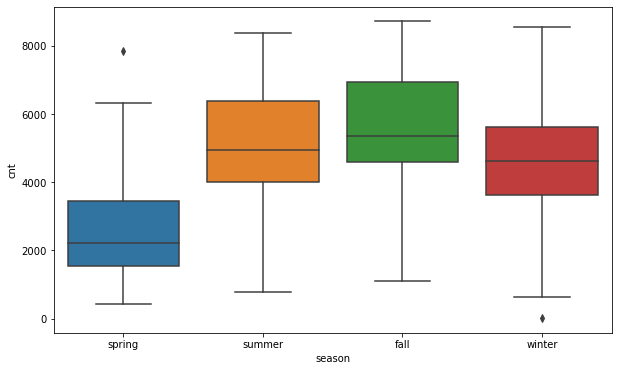

In [21]:
draw_boxplot('season')

#### Observation - In spring season count has significant low value, while Fall season is most favourable with summer being the next then winter

#### workingday

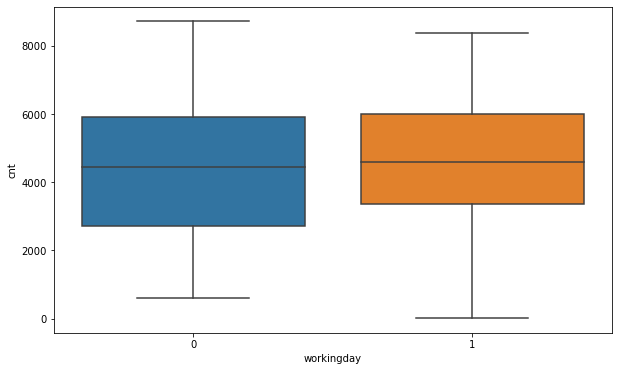

In [22]:
draw_boxplot('workingday')

#### Observation - the workingday and non-workingday have similar mean in terms of demand. However there is a low min value for the working day .We need further analysis on this.

#### yr (0: 2018 , 1:2019)

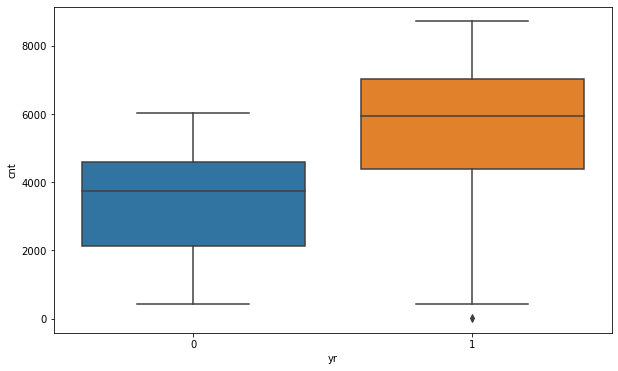

In [23]:
draw_boxplot('yr')

#### Observation - There was a clear surge in demand from 2018 to 2019. Bike sharing was getting popular during pre-covid time. 

#### mnth

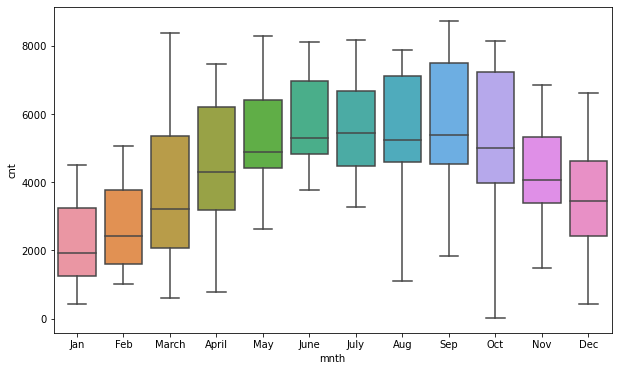

In [24]:
draw_boxplot('mnth')

#### Observation: 
<ul>
<li>May to Oct has high median while in Jan it is lowest then it is gradually increasing till july then again going down in winter months.
</li>
<li>
It means cnt increase in higher temperature months
    </li>
</ul>

#### weekday

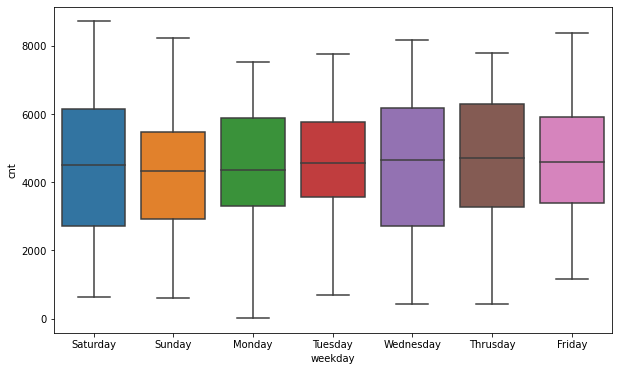

In [25]:
draw_boxplot('weekday')

#### Observation:

<ul>
<li>
    All Weekdays has fairly similar median, there is no significant diffference between them.
</li>
<li>
    Monday has Low Min value and Low Max Value than others.
</li>
</ul>


#### holiday

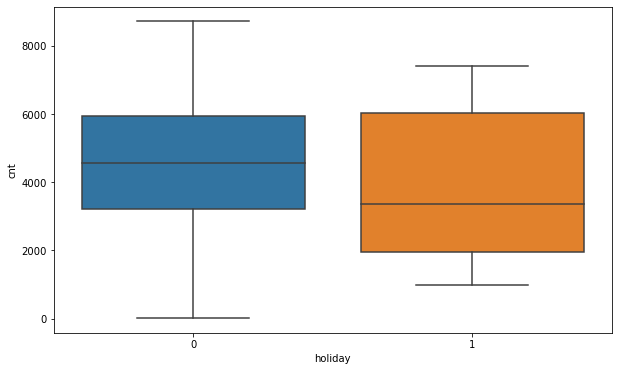

In [26]:
draw_boxplot('holiday')

#### Observation: 

<ul>
<li>
cnt median is low when there is a holiday with large range
</li>
<li>
On working days it has high median and low range
</li>
</ul>

#### weathersit

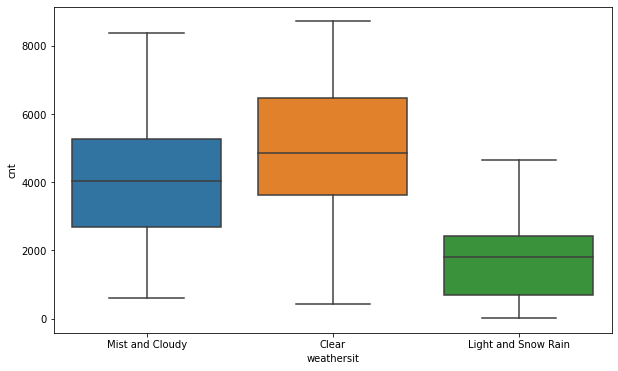

In [27]:
draw_boxplot('weathersit')

#### Observation
<ul>
<li>
    Clear Weather has highest count, which means bike sharing count is high in clear weather.
</li>
<li>
    While its quite low in Light and Snow Rain weather, which is quite understandable.
</li>
<li>
    Mist and Cloudy weather has fairly high count and higher median but it still less than Clear weather.
</li>
</ul>



#### Further analysis - for workingday and holiday

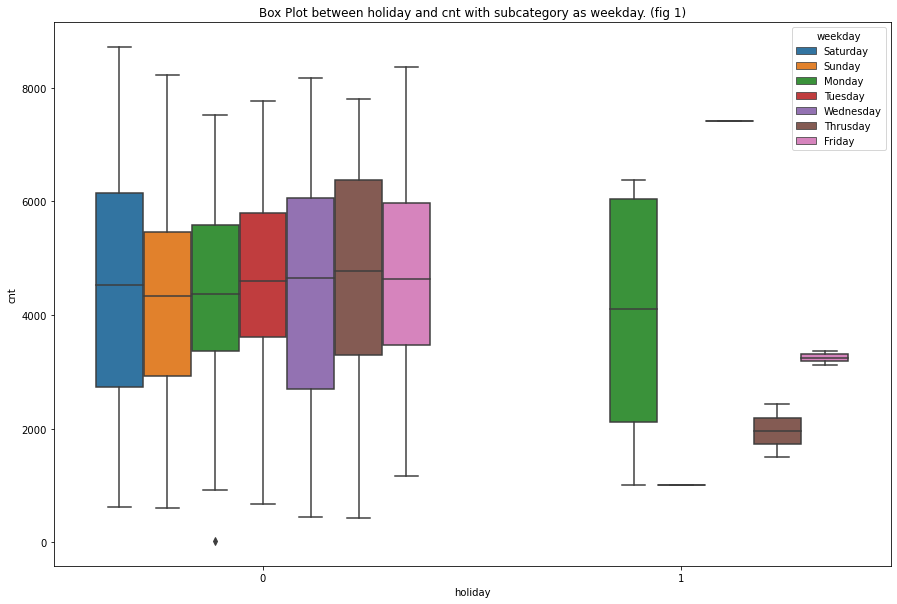

In [28]:
plt.figure(figsize=(15,10))
plt.title('Box Plot between holiday and cnt with subcategory as weekday. (fig 1)')
sns.boxplot(x=days.holiday, y=days.cnt, data=days, hue=days.weekday)

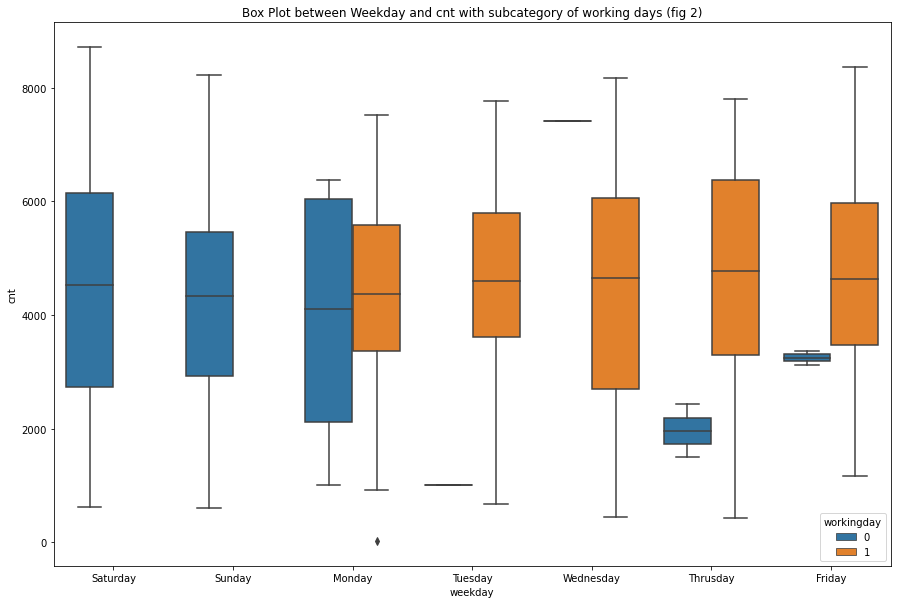

In [29]:
# Box plot between weekday and cnt
plt.figure(figsize=(15,10))
plt.title('Box Plot between Weekday and cnt with subcategory of working days (fig 2)')
sns.boxplot(x=days.weekday, y=days.cnt, data=days, hue=days.workingday)

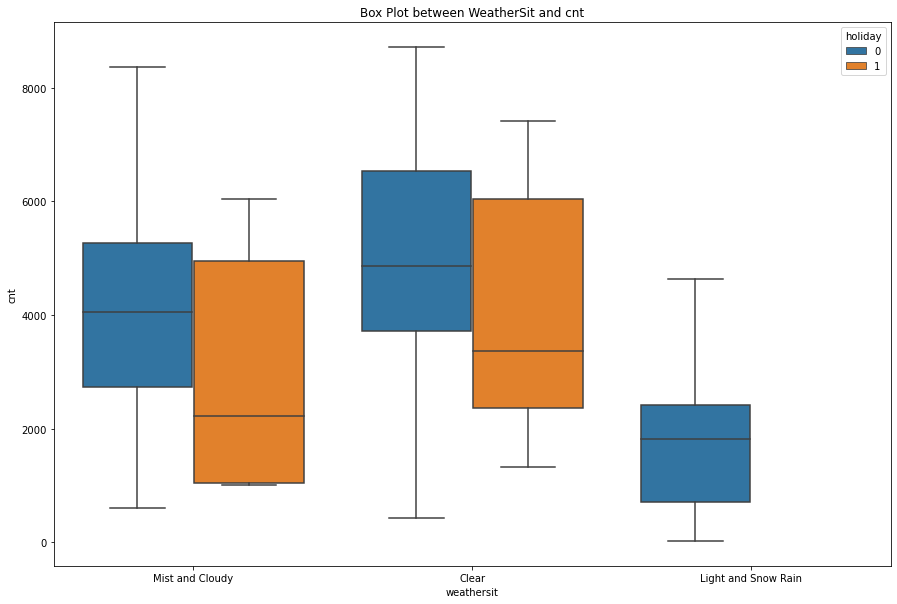

In [30]:
##Box plot between WeatherSit and cnt
plt.figure(figsize=(15,10))
plt.title('Box Plot between WeatherSit and cnt')
sns.boxplot(x=days.weathersit, y=days.cnt, data=days, hue=days.holiday)

#### Observations: 
- Monday appears to be a partial holiday from the analysis of fig 2 above and it has a higher range
- Thrusdays and Fridays have some holidays too.
- The demand is higher during working days and highest demand happens when weather is nice. We can infer that people share bikes for commuting to work.

## Data visualization for all the continuous variables

#### temp : temperature in Celsius

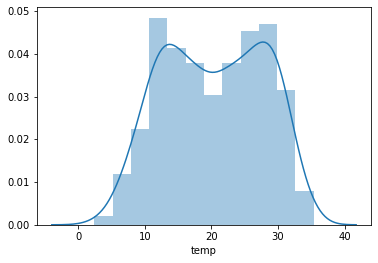

In [31]:
sns.distplot(days['temp'])
plt.show()

#### atemp: feeling temperature in Celsius


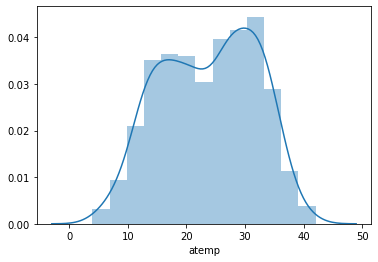

In [32]:
sns.distplot(days['atemp'])
plt.show()

#### hum: humidity

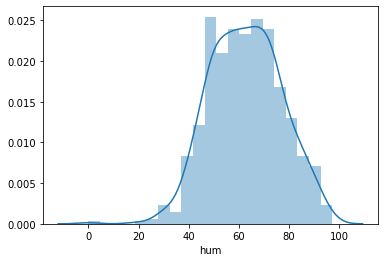

In [33]:
sns.distplot(days['hum'])
plt.show()

#### windspeed: wind speed

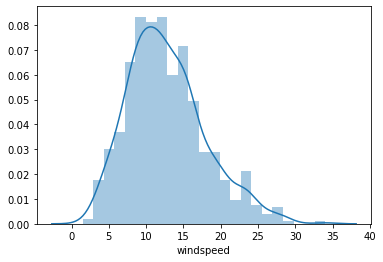

In [34]:
sns.distplot(days['windspeed'])
plt.show()

#### casual: count of casual users

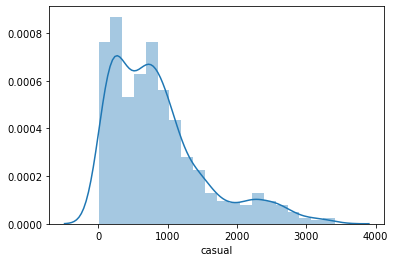

In [35]:
sns.distplot(days['casual'])
plt.show()

#### registered: count of registered users

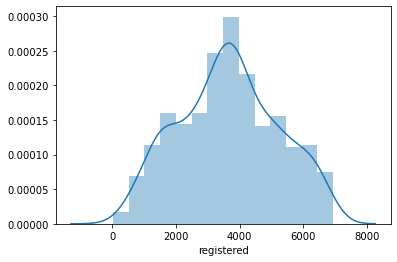

In [36]:
sns.distplot(days['registered'])
plt.show()

### Target variable -  cnt: count of total rental bikes including both casual and registered

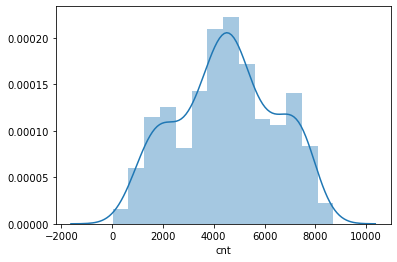

In [37]:
sns.distplot(days['cnt'])
plt.show()

In [38]:
days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 77.1+ KB


### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.


In [39]:
## All numeric variables in dataset
days_numeric = days.select_dtypes(include=['float64', 'int64'])
days_numeric.head()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [40]:
## Since instant isn't of any use to build linear regression model. Let's drop it.
## yr, holiday , workingday are binary variable .Let's drop them too.
days_numeric=days_numeric.drop('instant',axis=1,)
days_numeric.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Let's draw a pairwise scatter plot and observe the linear relationship

<Figure size 1440x720 with 0 Axes>

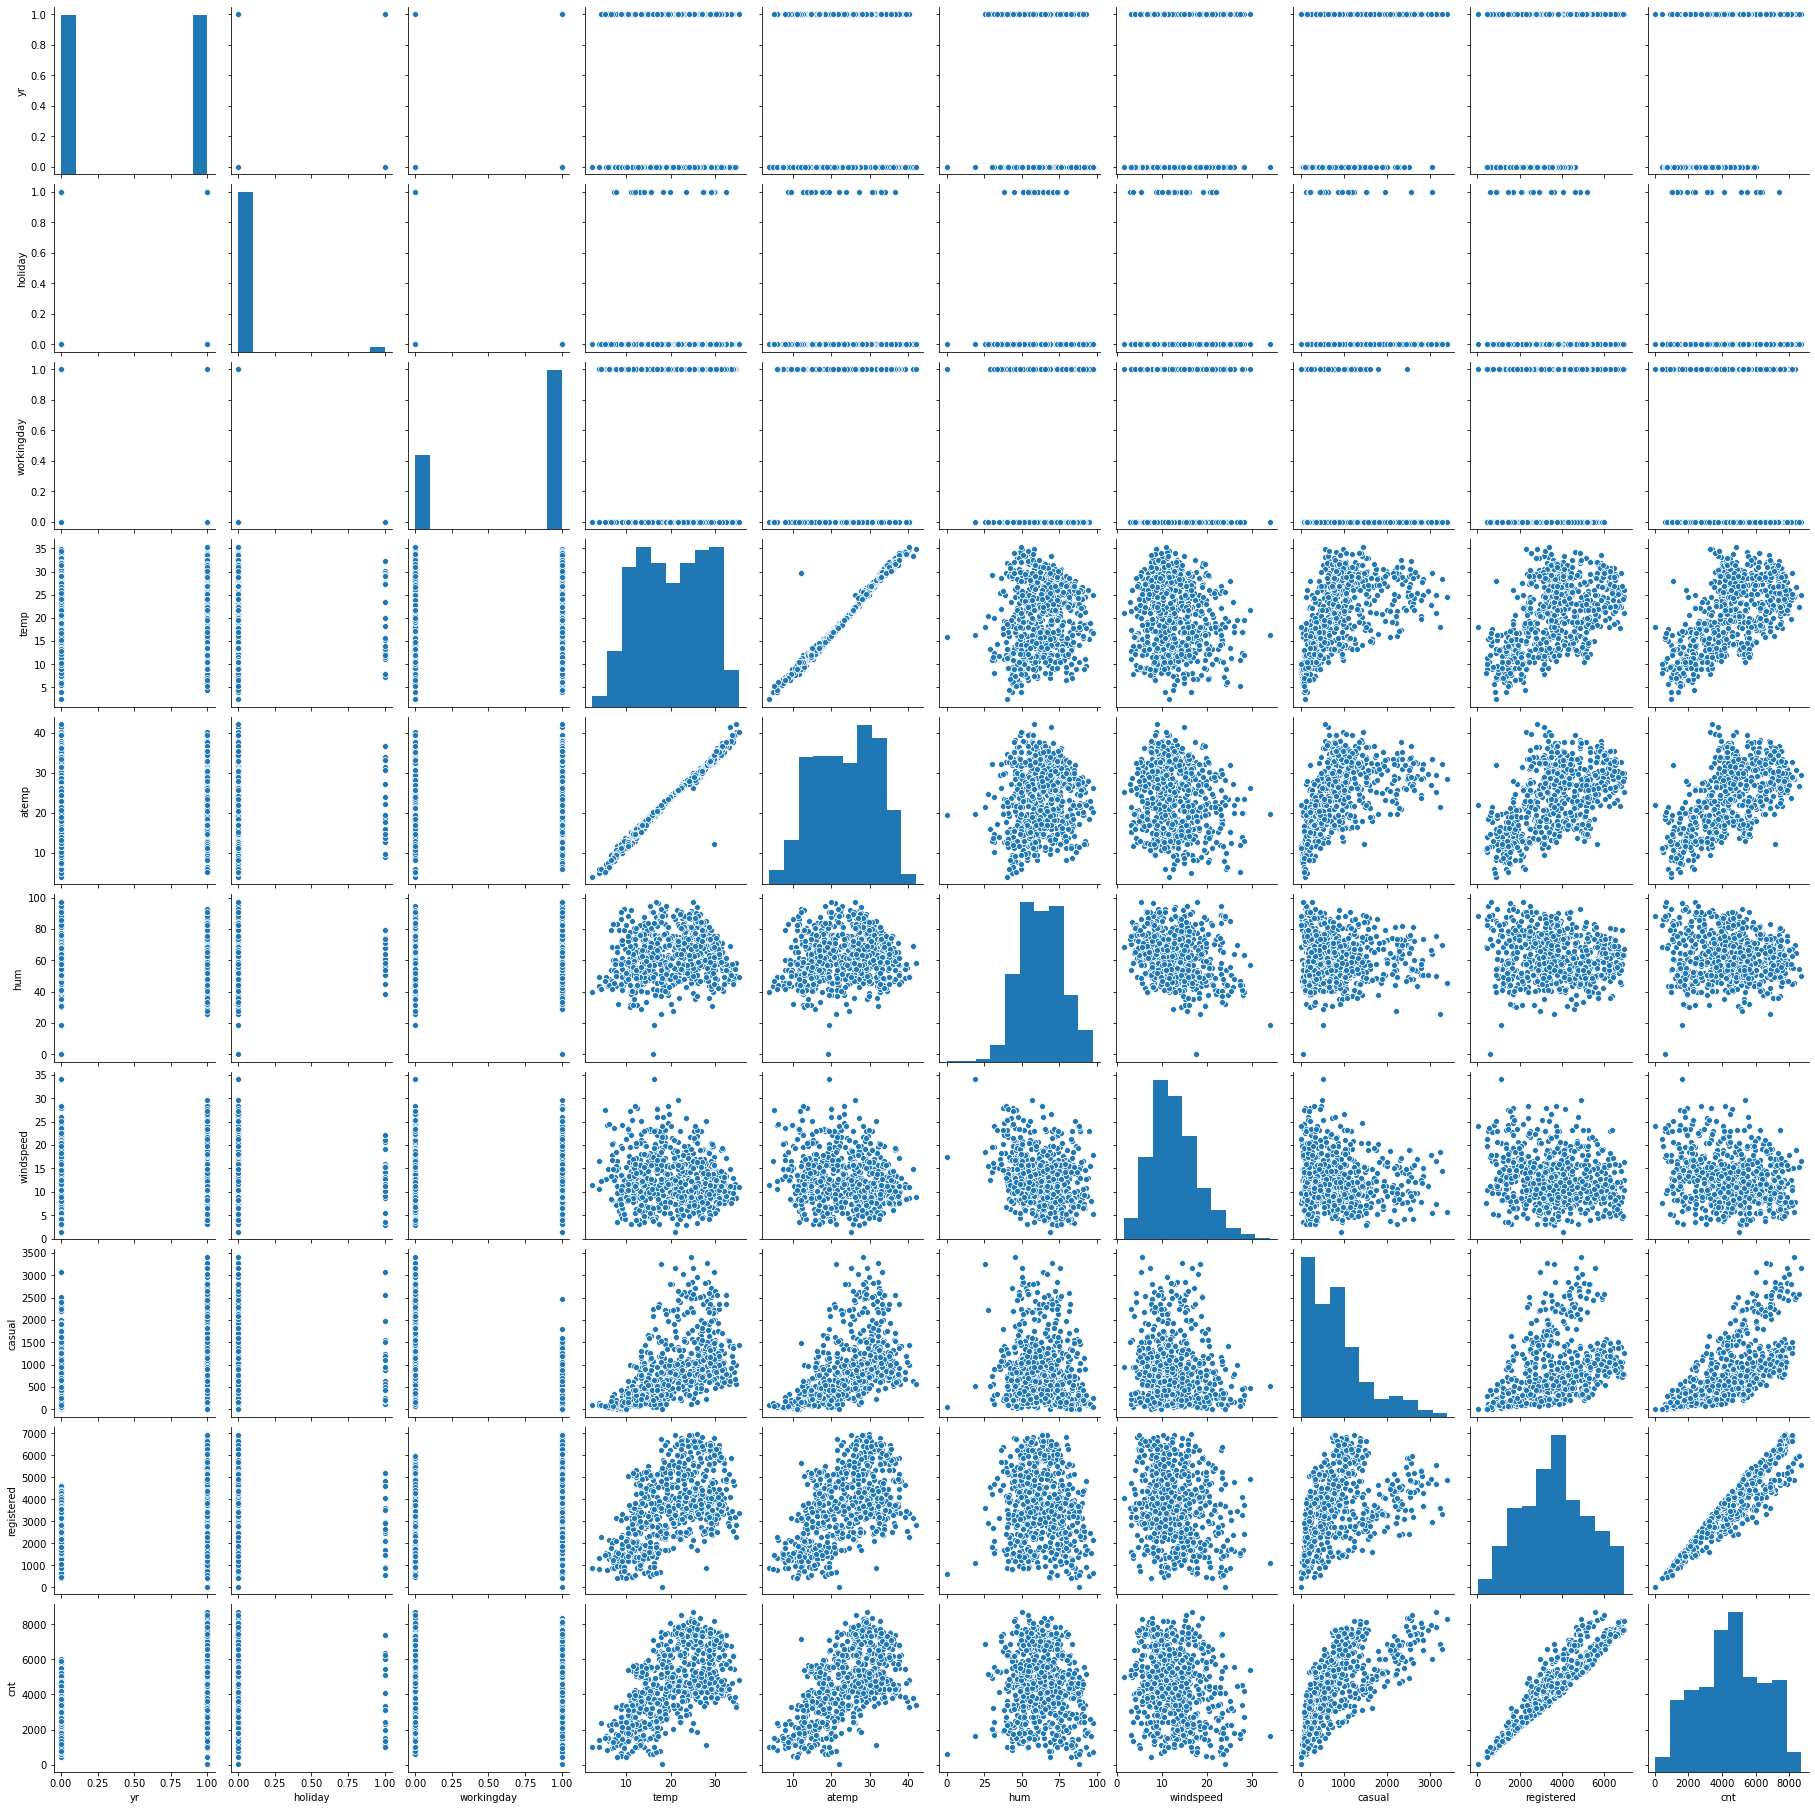

In [41]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(days_numeric)
plt.show()

#### It looks like cnt has fairly linear relationship with temp , atemp , windspeed, casual , registered etc.

In [42]:
days_numeric.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.250502,0.054055,-0.517607,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.596911,-0.109142,0.305437,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


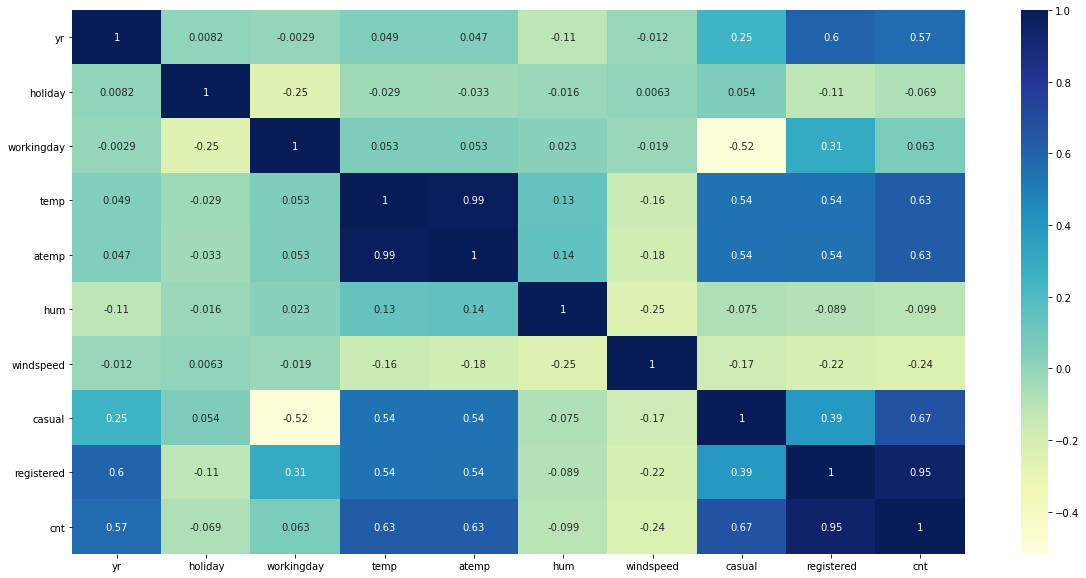

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(days_numeric.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### cnt has significant correlation with yr,temp, casual , registered
#### The independent variables - temp , atemp etc are highly correlated. We need to check the multicolinearity eventually. 

- It's clear from the EDA that instant and the dteday are not the predictor for the cnt
- temp and atemp are highly correlated - as we can see them highly correlated to each other
- cnt= casual+ registered , this is not very useful in the model building
- Let's drop all of them from the analysis


In [44]:
days[(days.cnt-(days.casual+days.registered))!=0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [45]:

df_bikes = days.drop(['atemp','instant','dteday','casual','registered'],axis=1)
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 51.4+ KB


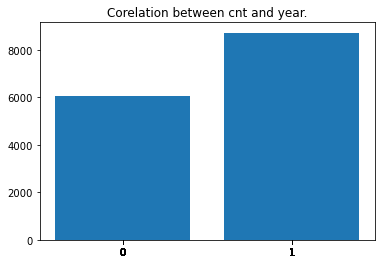

In [46]:
# plotting cnt vs year bar plot
plt.title('Corelation between cnt and year.')
plt.xticks(df_bikes.yr)
plt.bar(df_bikes.yr, df_bikes.cnt, width = .8)
plt.show()

#### It appears that bike sharing was getting popular in each year in the pre-COVID time.

<Figure size 1440x720 with 0 Axes>

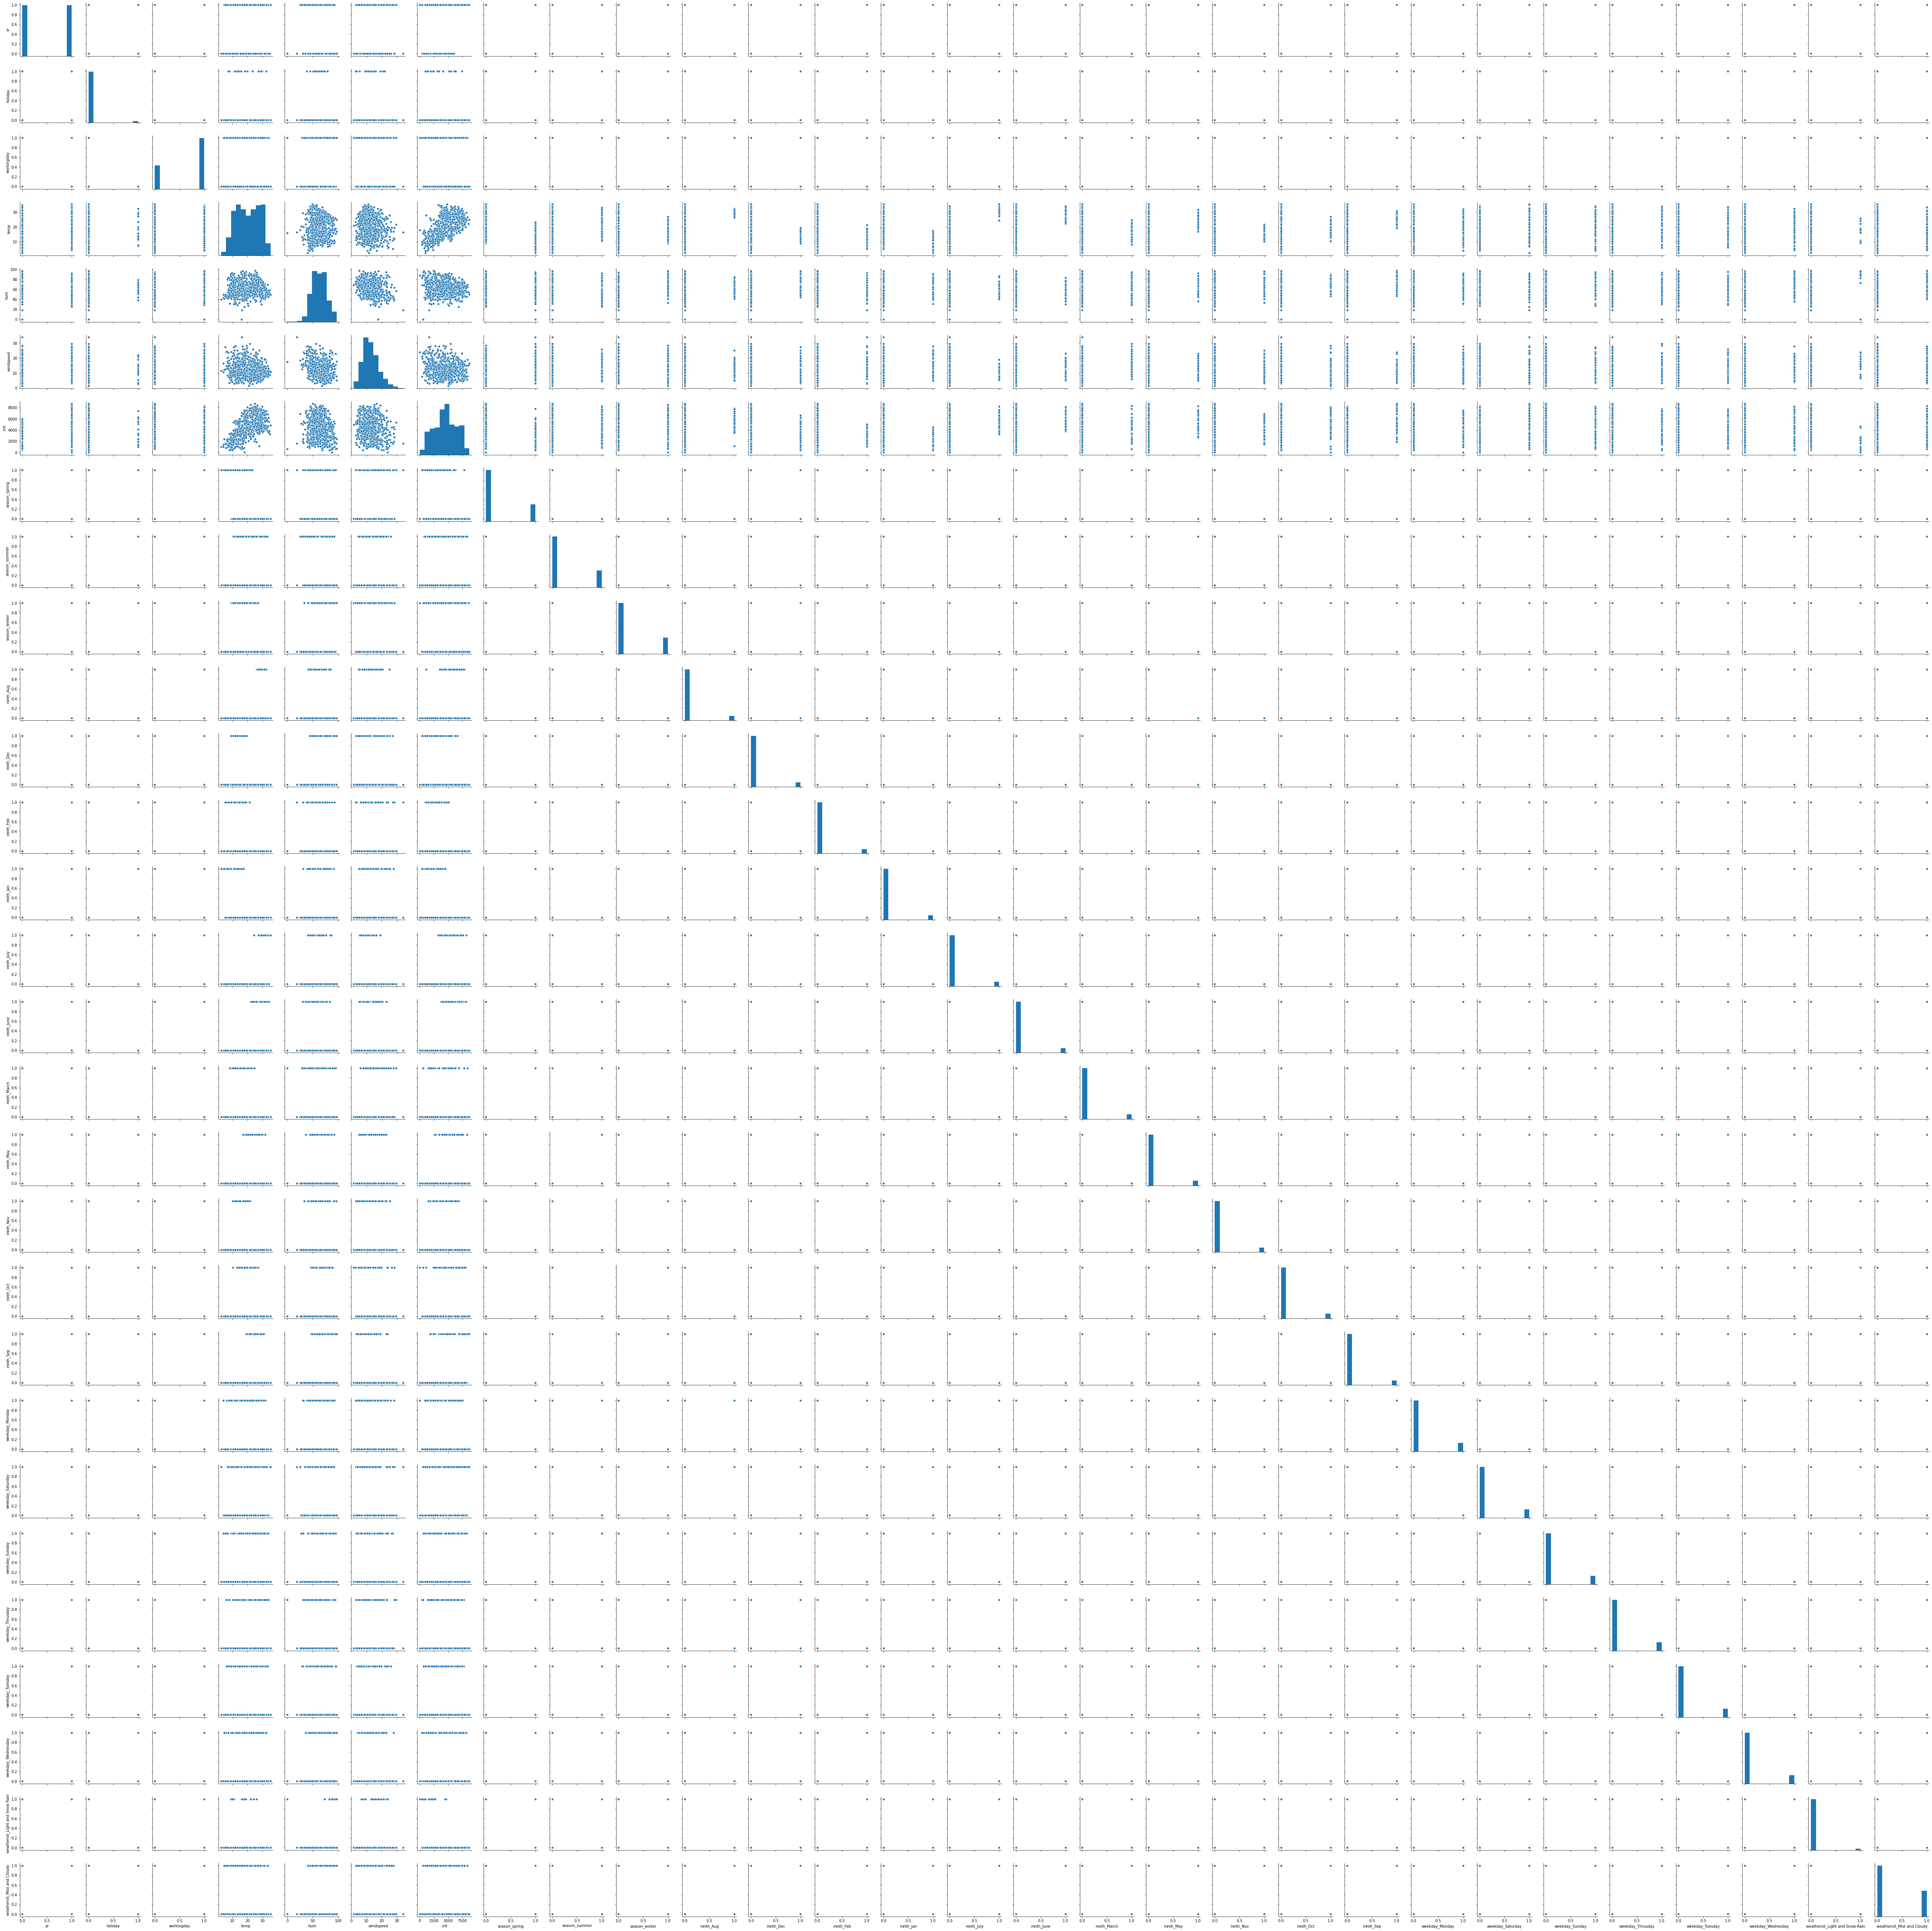

In [107]:
#### Let's draw a pairplot for the existing variables
plt.figure(figsize=(20, 10))
sns.pairplot(df_bikes)
plt.show()

#### Observation: Looking at the target variable temp has highest correlation with cnt , followed by yr and windspeed

## Find the correlation with Target Variable

In [48]:
np.abs(df_bikes.corr().cnt).sort_values(ascending=False)

cnt           1.000000
temp          0.627044
yr            0.569728
windspeed     0.235132
hum           0.098543
holiday       0.068764
workingday    0.062542
Name: cnt, dtype: float64

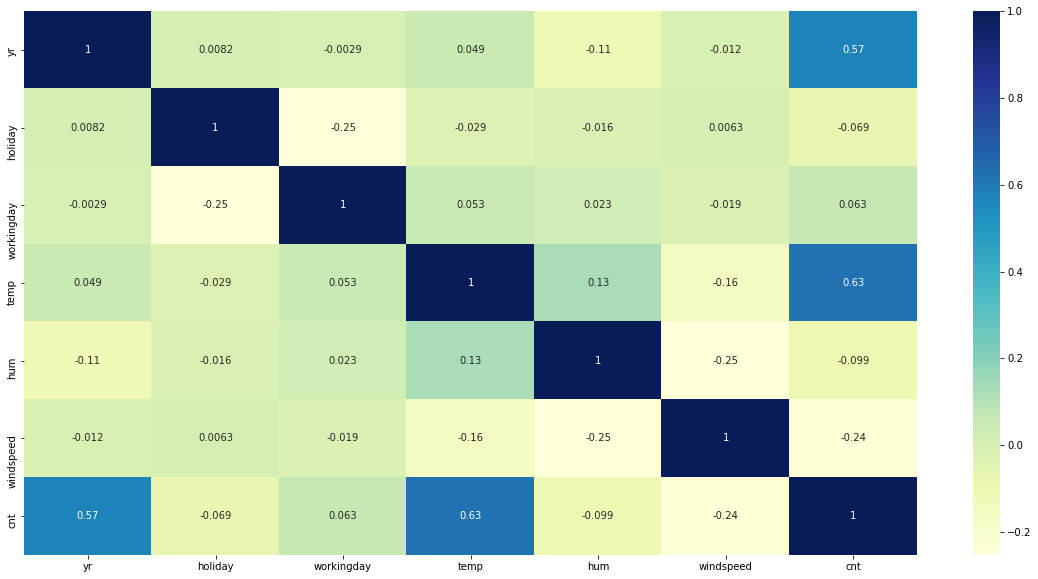

In [49]:
## Let's draw a heatmap for the data visualization
## heatmap of correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df_bikes.corr(), annot=True, cmap='YlGnBu')
plt.show()


#### Let's check for outliers before moving to the data preparation

In [50]:
df_bikes.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


#### Observation :  We don't have any outliers present.

## 03. Data Preparation

#### Lets prepare the data before building the model

In [51]:
## subset all the categorical variables
bikes_categorical = df_bikes.select_dtypes(include=['object'])
bikes_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Saturday,Mist and Cloudy
1,spring,Jan,Sunday,Mist and Cloudy
2,spring,Jan,Monday,Clear
3,spring,Jan,Tuesday,Clear
4,spring,Jan,Wednesday,Clear


In [52]:
## Convert into dummies
bike_dummies = pd.get_dummies(bikes_categorical, drop_first=True)
bike_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light and Snow Rain,weathersit_Mist and Cloudy
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
## Drop categorical variable columns
df_bikes = df_bikes.drop(list(bikes_categorical.columns), axis=1)

In [54]:
df_bikes.shape

(730, 7)

In [55]:
## Concatenate the dummy variables with the main dataframe
df_bikes = pd.concat([df_bikes,bike_dummies],axis=1)
df_bikes.shape

(730, 29)

In [56]:
## Let's check the first few rows
df_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light and Snow Rain,weathersit_Mist and Cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## 04. Model Building and Evaluation

#### The first step for the model building is to split the dataset into train-test split.

In [57]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_bikes, test_size=0.3, random_state=100)

In [58]:
# Let's check the train dataset
df_train.shape

(511, 29)

In [59]:
# Let's check the test dataset
df_test.shape

(219, 29)

In [60]:
df_bikes.shape

(730, 29)

In [61]:
def extract_numerical(df):
    continousVar=[]
    for i in df.columns:
        if df[i].nunique() > 2:
            continousVar.append(i)
    
    return continousVar

bikes_numeric = extract_numerical(df_bikes)
bikes_numeric

['temp', 'hum', 'windspeed', 'cnt']

## Scaling

We have our test train split. We need to scale the variables in the train data set for the better interpretability. 
Please note : We need to apply scaling on the continuous variables only.

In [62]:
# Import the MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()
df_train[bikes_numeric] = scaler.fit_transform(df_train[bikes_numeric])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light and Snow Rain,weathersit_Mist and Cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [63]:
df_train[bikes_numeric].describe()

,temp,hum,windspeed,cnt
count,511.000000,511.000000,511.000000,511.000000
mean,0.537386,0.650333,0.320844,0.514186
std,0.225640,0.145741,0.169639,0.224737
min,0.000000,0.000000,0.000000,0.000000
25%,0.341151,0.538858,0.199179,0.356765
50%,0.542077,0.653499,0.298098,0.519673
75%,0.735215,0.754401,0.414438,0.688737
max,1.000000,1.000000,1.000000,1.000000


In [64]:
# Split the train dataset into X and y

y_train = df_train.pop('cnt')
X_train = df_train
X_train.shape

(511, 28)

## Building First Model with all the features

In [65]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [66]:
## Print coefficients
print(lm.coef_)

[ 2.33186795e-01  5.08087047e+11  5.08087047e+11  4.44702148e-01
 -1.52923584e-01 -1.86874986e-01 -4.37622070e-02  4.28771973e-02
  1.07864380e-01  2.07214355e-02 -4.44946289e-02 -3.35311890e-02
 -6.43348694e-02 -3.34930420e-02  4.82177734e-03  1.61933899e-03
  2.50854492e-02 -3.99398804e-02  1.02996826e-02  8.62436295e-02
 -2.10571289e-02  5.08087047e+11  5.08087047e+11 -8.94927979e-03
 -1.62029266e-02 -5.40542603e-03 -2.56103516e-01 -5.93795776e-02]


In [67]:
## Print intercepts
print(lm.intercept_)

-508087046683.9594


## Building Model with RFE - Recursive feature elimination

**We have close to 28 features. It will be very time consuming to eliminate the features manually. Let's apply RFE to shortlist the feature. Let's select 15 arbitary feature for analysis initially.**

In [68]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light and Snow Rain', True, 1),
 ('weathersit_Mist and Cloudy', True, 1)]

In [69]:
## selcting top  columns selected by rfe
col = X_train.columns[rfe1.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_July',
       'mnth_Sep', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Light and Snow Rain', 'weathersit_Mist and Cloudy'],
      dtype='object')

In [70]:
## columns rejec
X_train.columns[~rfe1.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June',
       'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

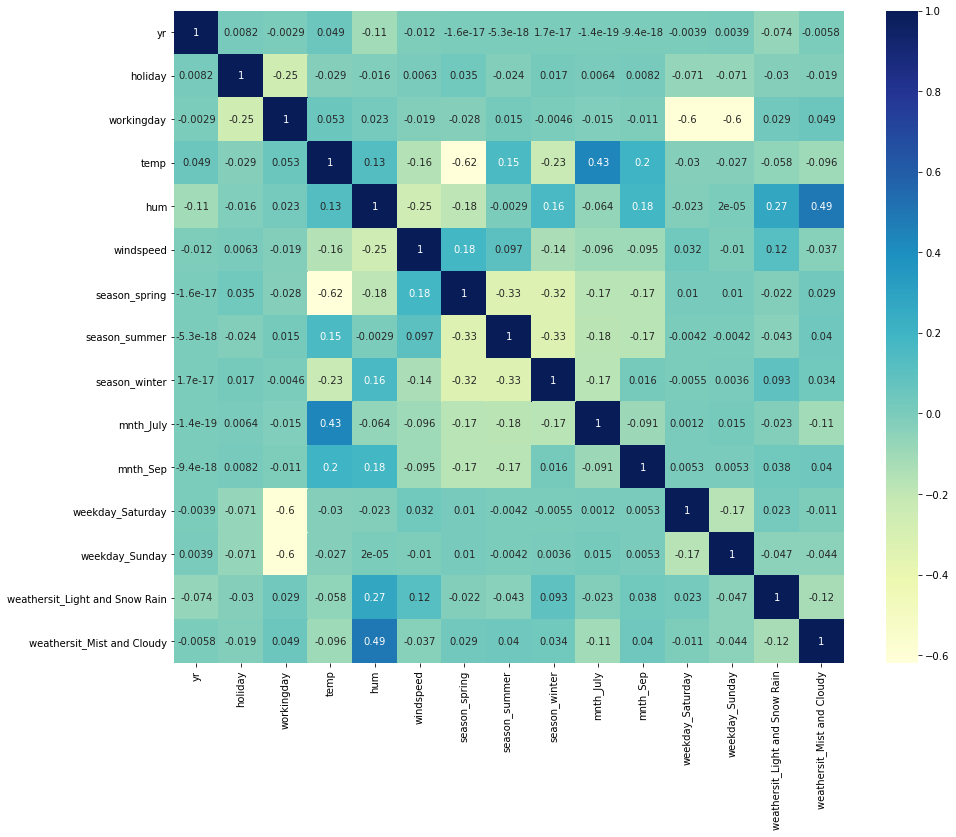

In [71]:
## checking correlation of selected col
plt.figure(figsize=(15,12))
sns.heatmap(df_bikes[col].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [72]:
## Function to compute vif

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(input_df):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    X_train_vif = input_df.drop('const', axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Build model and evaluation with statsmodels

In [73]:
# Import statsmodels
import statsmodels.api as sm  

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light and Snow Rain,weathersit_Mist and Cloudy
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,1,0,0,1


In [74]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.8
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          3.02e-190
Time:                        03:52:12   Log-Likelihood:                 514.19
No. Observations:                 511   AIC:                            -998.4
Df Residuals:                     496   BIC:                            -934.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [75]:
vif=compute_vif(X_train_rfe1)
vif

,Features,VIF
2,workingday,50.83
11,weekday_Saturday,12.20
12,weekday_Sunday,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.50
1,holiday,2.91
7,season_summer,2.62
4,hum,1.91
14,weathersit_Mist and Cloudy,1.57


#### workingday has a high p-value as well as high VIF. Let's remove it from the model.

In [76]:
X_train_rfe1.drop('workingday', axis=1, inplace=True)
lm2 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          7.31e-192
Time:                        03:52:12   Log-Likelihood:                 518.04
No. Observations:                 511   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -942.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [77]:
vif=compute_vif(X_train_rfe1)
vif

,Features,VIF
3,hum,28.28
2,temp,16.08
4,windspeed,4.69
5,season_spring,4.03
7,season_winter,3.37
6,season_summer,2.79
13,weathersit_Mist and Cloudy,2.30
0,yr,2.08
8,mnth_July,1.59
9,mnth_Sep,1.39


#### weekday_Saturday has high p-value . Let's remove it from the model.

In [78]:
X_train_rfe1.drop('weekday_Saturday', axis=1, inplace=True)
lm3 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          7.13e-193
Time:                        03:52:12   Log-Likelihood:                 517.66
No. Observations:                 511   AIC:                            -1007.
Df Residuals:                     497   BIC:                            -948.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [79]:
vif=compute_vif(X_train_rfe1)
vif

,Features,VIF
3,hum,28.27
2,temp,16.05
4,windspeed,4.66
5,season_spring,4.01
7,season_winter,3.35
6,season_summer,2.79
12,weathersit_Mist and Cloudy,2.30
0,yr,2.08
8,mnth_July,1.59
9,mnth_Sep,1.39


#### hum has very high VIF. Let's remove it from the model

In [80]:
X_train_rfe1.drop('hum', axis=1, inplace=True)
lm4 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          5.26e-190
Time:                        03:52:12   Log-Likelihood:                 508.04
No. Observations:                 511   AIC:                            -990.1
Df Residuals:                     498   BIC:                            -935.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [81]:
vif=compute_vif(X_train_rfe1)
vif

,Features,VIF
2,temp,5.15
3,windspeed,4.61
5,season_summer,2.24
4,season_spring,2.11
0,yr,2.07
6,season_winter,1.82
7,mnth_July,1.59
11,weathersit_Mist and Cloudy,1.55
8,mnth_Sep,1.34
9,weekday_Sunday,1.18


#### temp has the border line VIF. Let's drop it.

In [82]:
X_train_rfe2=X_train_rfe1.drop('temp', axis=1)
lm5 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          6.15e-151
Time:                        03:52:13   Log-Likelihood:                 412.67
No. Observations:                 511   AIC:                            -801.3
Df Residuals:                     499   BIC:                            -750.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [83]:
vif=compute_vif(X_train_rfe2)
vif

,Features,VIF
2,windspeed,3.83
3,season_spring,2.09
4,season_summer,2.03
0,yr,1.84
5,season_winter,1.78
10,weathersit_Mist and Cloudy,1.51
6,mnth_July,1.21
8,weekday_Sunday,1.17
7,mnth_Sep,1.16
9,weathersit_Light and Snow Rain,1.08


#### When we drop temperature there is a significant drop in r2_score . Hence Let's keep the temperature in the model and remove windspeed itself.

In [84]:
X_train_rfe1.drop('windspeed', axis=1, inplace=True)
lm6 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.8
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          9.66e-184
Time:                        03:52:13   Log-Likelihood:                 490.37
No. Observations:                 511   AIC:                            -956.7
Df Residuals:                     499   BIC:                            -905.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [85]:
vif=compute_vif(X_train_rfe1)
vif

,Features,VIF
2,temp,4.28
0,yr,2.07
4,season_summer,1.95
5,season_winter,1.61
6,mnth_July,1.58
10,weathersit_Mist and Cloudy,1.55
3,season_spring,1.43
7,mnth_Sep,1.34
8,weekday_Sunday,1.18
9,weathersit_Light and Snow Rain,1.07


####  The model lm6 looks good . However season_summer has little higher p-value but not above the threshold value. Let's drop it and check if there is any other significant impact

In [86]:
X_train_rfe1.drop('season_summer', axis=1, inplace=True)
lm7 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          1.19e-183
Time:                        03:52:13   Log-Likelihood:                 487.32
No. Observations:                 511   AIC:                            -952.6
Df Residuals:                     500   BIC:                            -906.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [87]:
vif=compute_vif(X_train_rfe1)
vif

,Features,VIF
2,temp,3.09
0,yr,2.05
9,weathersit_Mist and Cloudy,1.51
4,season_winter,1.35
5,mnth_July,1.33
3,season_spring,1.27
6,mnth_Sep,1.19
7,weekday_Sunday,1.17
8,weathersit_Light and Snow Rain,1.07
1,holiday,1.05


## 05. Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [88]:
y_train_cnt = lm7.predict(X_train_rfe1)

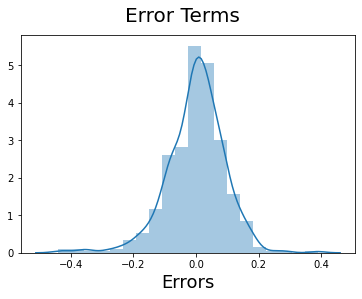

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Mean of Residuals

In [90]:
res=y_train - y_train_cnt
mean_residuals = np.mean(res)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.2676622877421435e-16


#### Means of Residuals are close 0 . We are good here.

### Check for Homoscedasticity

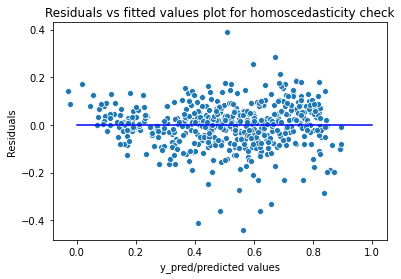

In [91]:
p = sns.scatterplot(y_train_cnt,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [92]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(res, X_train_rfe1)
lzip(name, test)

[('F statistic', 1.1070554515955917), ('p-value', 0.21351777812673153)]

### No autocorrelation of residuals

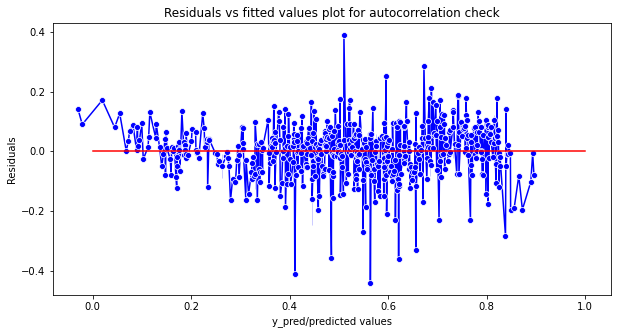

In [93]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_train_cnt,res,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [94]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(res , lags = 40)[1])

0.687068481083853

## 06. Making predictions

In [95]:
## Performing scaling on test numeric data
bikes_numeric

['temp', 'hum', 'windspeed', 'cnt']

In [96]:
# Fitting on dataset
df_test[bikes_numeric] = scaler.transform(df_test[bikes_numeric])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light and Snow Rain,weathersit_Mist and Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [97]:
y_test = df_test.pop('cnt')
X_test = df_test

In [98]:
# Now let's use the model to make predictions.
X_train_vif = X_train_rfe1.drop('const', axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_vif.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [99]:
# Making Prediction
y_pred = lm7.predict(X_test_new)

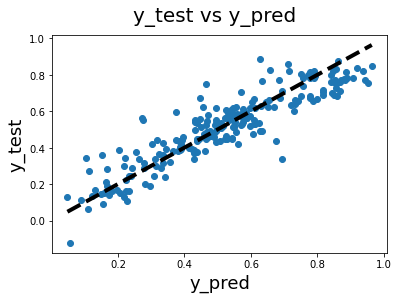

In [100]:
# Plotting y_test and y_pred to understand the spread

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
fig.suptitle('y_test vs y_pred', fontsize = 20)   
ax.set_xlabel('y_pred' , fontsize=18)
ax.set_ylabel('y_test'  , fontsize=18)
plt.show()

In [101]:

from sklearn.metrics import r2_score
r_squared=r2_score(y_test, y_pred)
r_squared

0.8117710168711325

In [102]:
# Calculating Adjusted R2-sore
Adj_r2 = 1-(1-r_squared)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test_new.shape[1]-1)
Adj_r2

0.8017685105212893

In [103]:
# Looking at RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.09455203684221516

### Final Model - lm7

In [104]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sat, 29 Aug 2020   Prob (F-statistic):          1.19e-183
Time:                        03:52:14   Log-Likelihood:                 487.32
No. Observations:                 511   AIC:                            -952.6
Df Residuals:                     500   BIC:                            -906.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

<b><i>cnt = 0.2026 + 0.2336 X yr -0.1088 X holiday + 0.4689 X temp -0.1113 X season_spring +0.0569   X season_winter -0.0669 X mnth_July +0.0639 X mnth_Sep  -0.0483 X weekday_Sunday -0.3052 X weathersit_Light and Snow Rain  -0.0806  X weathersit_Mist and Cloudy</i></b>

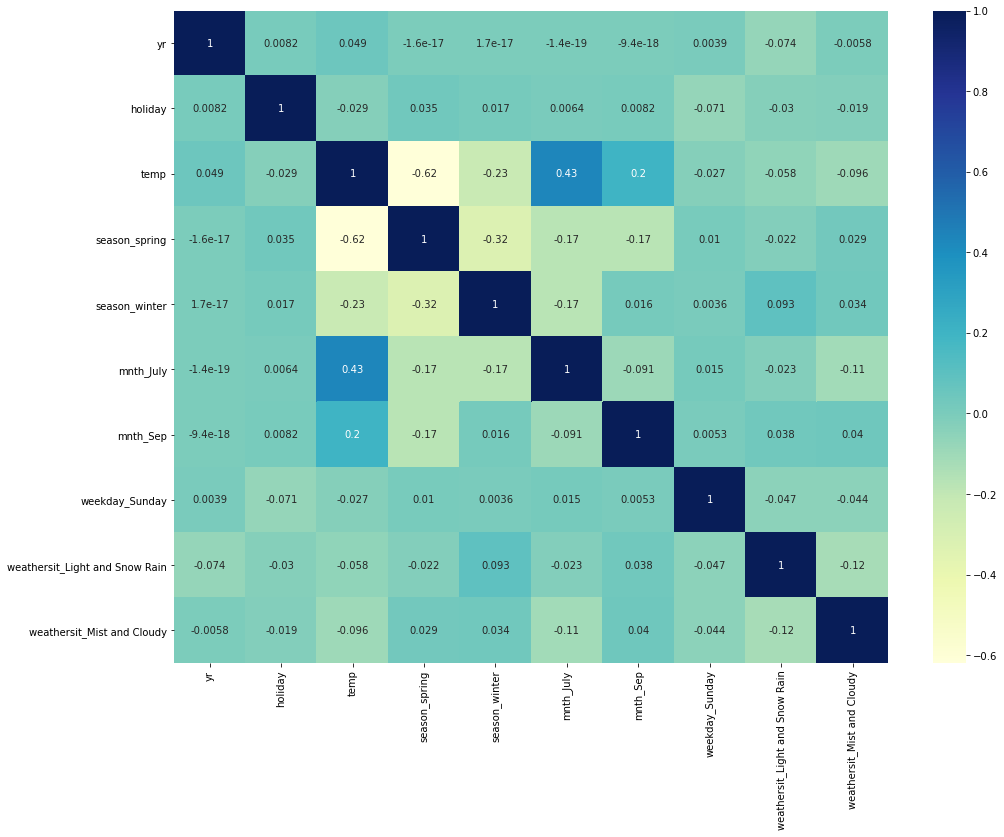

In [105]:
# Figure size
plt.figure(figsize=(16,12))

# Heatmap
sns.heatmap(df_bikes[X_train_vif.columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Final Results

#### Final Model - lm7

**Total variable used : 10**

**On Train set**

    - R2 score = 82.8%
    - Adjusted R2 = 82.4%

**On Test set**

    - R2 score = 81.17%
    - Adjusted R2 = 80.17%





### Recommendations
 - Boombikes should focus on temperature
 - Boombike should consider light and snowy weather
 - Boombike should focus on season spring
 